<a href="https://colab.research.google.com/github/AditiRastogi250701/Image-Classification/blob/main/Classification_Transfer_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#importing the pre-trained model
IMAGE_SHAPE=(224,224)
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", 
                   input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
labels=pd.read_csv(r'/content/Labels.txt',sep='\n',header=None)

In [4]:
labels

,0
0,background
1,tench
2,goldfish
3,great white shark
4,tiger shark
...,...
996,earthstar
997,hen-of-the-woods
998,bolete
999,ear


In [5]:
labels.value_counts()

crane           2
maillot         2
zucchini        1
crib            1
dam             1
               ..
papillon        1
paper towel     1
panpipe         1
palace          1
Afghan hound    1
Length: 999, dtype: int64

In [6]:
IMAGE_SHAPE

(224, 224)

## Prediction

In [7]:
img=Image.open(r'/content/SAMPLE3.jfif').resize(IMAGE_SHAPE)

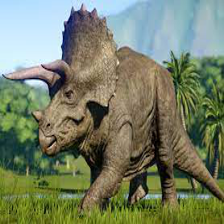

In [8]:
img

In [9]:
img=np.array(img)

In [10]:
img.shape

(224, 224, 3)

In [11]:
img

array([[[175, 219, 254],
        [175, 219, 254],
        [175, 219, 254],
        ...,
        [137, 168, 173],
        [135, 166, 171],
        [134, 165, 170]],

       [[176, 220, 255],
        [176, 220, 255],
        [176, 220, 255],
        ...,
        [138, 169, 174],
        [136, 167, 172],
        [134, 165, 170]],

       [[177, 220, 254],
        [177, 220, 254],
        [177, 220, 254],
        ...,
        [138, 169, 174],
        [136, 167, 172],
        [134, 165, 170]],

       ...,

       [[ 98, 108,  21],
        [ 96, 106,  20],
        [ 89,  98,  14],
        ...,
        [ 67,  71,   0],
        [ 93, 100,  22],
        [104, 112,  30]],

       [[ 98, 108,  21],
        [ 86,  96,  11],
        [ 78,  88,   4],
        ...,
        [ 64,  71,   0],
        [ 93, 100,  23],
        [106, 115,  33]],

       [[ 99, 109,  22],
        [ 80,  90,   8],
        [ 73,  82,   2],
        ...,
        [ 65,  71,   0],
        [ 95, 102,  25],
        [110, 119,  37]]

In [12]:
#scaling the images
img=img/255.

In [13]:
img

array([[[0.68627451, 0.85882353, 0.99607843],
        [0.68627451, 0.85882353, 0.99607843],
        [0.68627451, 0.85882353, 0.99607843],
        ...,
        [0.5372549 , 0.65882353, 0.67843137],
        [0.52941176, 0.65098039, 0.67058824],
        [0.5254902 , 0.64705882, 0.66666667]],

       [[0.69019608, 0.8627451 , 1.        ],
        [0.69019608, 0.8627451 , 1.        ],
        [0.69019608, 0.8627451 , 1.        ],
        ...,
        [0.54117647, 0.6627451 , 0.68235294],
        [0.53333333, 0.65490196, 0.6745098 ],
        [0.5254902 , 0.64705882, 0.66666667]],

       [[0.69411765, 0.8627451 , 0.99607843],
        [0.69411765, 0.8627451 , 0.99607843],
        [0.69411765, 0.8627451 , 0.99607843],
        ...,
        [0.54117647, 0.6627451 , 0.68235294],
        [0.53333333, 0.65490196, 0.6745098 ],
        [0.5254902 , 0.64705882, 0.66666667]],

       ...,

       [[0.38431373, 0.42352941, 0.08235294],
        [0.37647059, 0.41568627, 0.07843137],
        [0.34901961, 0

In [14]:
img[np.newaxis,...].shape

(1, 224, 224, 3)

In [15]:
img=img[np.newaxis,...]

In [16]:
prediction=model.predict(img)

In [17]:
prediction

array([[ 0.3238162 ,  0.37826908, -0.39912003, ..., -0.112207  ,
        -0.56578076, -0.8044958 ]], dtype=float32)

In [18]:
#finding the label having max probability

prediction=np.argmax(prediction)

In [19]:
prediction

52

In [20]:
labels

,0
0,background
1,tench
2,goldfish
3,great white shark
4,tiger shark
...,...
996,earthstar
997,hen-of-the-woods
998,bolete
999,ear


In [21]:
labels.iloc[52]

0    triceratops
Name: 52, dtype: object

## Validating


In [22]:
image=cv2.imread(r'/content/SAMPLE5.jpg')

In [23]:
image=cv2.resize(image,IMAGE_SHAPE)

In [24]:
image=np.array(image)

In [25]:
image.shape

(224, 224, 3)

In [26]:
image

array([[[224, 219, 220],
        [224, 219, 220],
        [225, 220, 221],
        ...,
        [217, 215, 215],
        [215, 215, 215],
        [215, 215, 215]],

       [[224, 219, 220],
        [224, 219, 220],
        [225, 220, 221],
        ...,
        [217, 215, 215],
        [217, 215, 215],
        [217, 215, 215]],

       [[224, 219, 220],
        [224, 219, 220],
        [225, 220, 221],
        ...,
        [217, 215, 215],
        [219, 214, 215],
        [219, 214, 215]],

       ...,

       [[ 21, 161, 118],
        [ 35, 161, 120],
        [ 26, 163, 116],
        ...,
        [ 34, 161, 114],
        [ 50, 165, 122],
        [ 52, 169, 126]],

       [[ 22, 162, 121],
        [ 27, 162, 118],
        [ 28, 161, 118],
        ...,
        [ 65, 173, 131],
        [ 51, 164, 120],
        [ 49, 167, 125]],

       [[ 22, 163, 121],
        [ 28, 163, 119],
        [ 31, 166, 122],
        ...,
        [ 62, 167, 126],
        [ 54, 164, 121],
        [ 47, 162, 121]]

In [27]:
#scaling the images
image=image/255.

In [28]:
image

array([[[0.87843137, 0.85882353, 0.8627451 ],
        [0.87843137, 0.85882353, 0.8627451 ],
        [0.88235294, 0.8627451 , 0.86666667],
        ...,
        [0.85098039, 0.84313725, 0.84313725],
        [0.84313725, 0.84313725, 0.84313725],
        [0.84313725, 0.84313725, 0.84313725]],

       [[0.87843137, 0.85882353, 0.8627451 ],
        [0.87843137, 0.85882353, 0.8627451 ],
        [0.88235294, 0.8627451 , 0.86666667],
        ...,
        [0.85098039, 0.84313725, 0.84313725],
        [0.85098039, 0.84313725, 0.84313725],
        [0.85098039, 0.84313725, 0.84313725]],

       [[0.87843137, 0.85882353, 0.8627451 ],
        [0.87843137, 0.85882353, 0.8627451 ],
        [0.88235294, 0.8627451 , 0.86666667],
        ...,
        [0.85098039, 0.84313725, 0.84313725],
        [0.85882353, 0.83921569, 0.84313725],
        [0.85882353, 0.83921569, 0.84313725]],

       ...,

       [[0.08235294, 0.63137255, 0.4627451 ],
        [0.1372549 , 0.63137255, 0.47058824],
        [0.10196078, 0

In [29]:
image=image[np.newaxis,...]

In [30]:
image.shape

(1, 224, 224, 3)

In [31]:
image

array([[[[0.87843137, 0.85882353, 0.8627451 ],
         [0.87843137, 0.85882353, 0.8627451 ],
         [0.88235294, 0.8627451 , 0.86666667],
         ...,
         [0.85098039, 0.84313725, 0.84313725],
         [0.84313725, 0.84313725, 0.84313725],
         [0.84313725, 0.84313725, 0.84313725]],

        [[0.87843137, 0.85882353, 0.8627451 ],
         [0.87843137, 0.85882353, 0.8627451 ],
         [0.88235294, 0.8627451 , 0.86666667],
         ...,
         [0.85098039, 0.84313725, 0.84313725],
         [0.85098039, 0.84313725, 0.84313725],
         [0.85098039, 0.84313725, 0.84313725]],

        [[0.87843137, 0.85882353, 0.8627451 ],
         [0.87843137, 0.85882353, 0.8627451 ],
         [0.88235294, 0.8627451 , 0.86666667],
         ...,
         [0.85098039, 0.84313725, 0.84313725],
         [0.85882353, 0.83921569, 0.84313725],
         [0.85882353, 0.83921569, 0.84313725]],

        ...,

        [[0.08235294, 0.63137255, 0.4627451 ],
         [0.1372549 , 0.63137255, 0.47058824]

In [32]:
result=model.predict(image)

In [33]:
result=np.argmax(result)

In [34]:
result

71

In [35]:
labels

,0
0,background
1,tench
2,goldfish
3,great white shark
4,tiger shark
...,...
996,earthstar
997,hen-of-the-woods
998,bolete
999,ear


In [36]:
labels.iloc[71]

0    harvestman
Name: 71, dtype: object

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________
